# Twitter Experiment
### This notebook contains the code for the experiment on twitter data, with *economy* and *obamacare* seed words

In [2]:
import torch
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append("../")
#
import torch.nn as nn

from time import time

import re

from sklearn.decomposition import NMF


from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

import ssnmf
from ssnmf import SSNMF

### Function to covert list of keywords to topic vector

In [3]:
def d_to_v(d, verbose=True):
    """
    Given dictionary d of form {word: weight}, created GT topic vector v. See writeup for details.
    """
    l = list(idx_to_word)
    v = np.zeros(idx_to_word.shape[0])
    
    for key in d.keys():
        i = l.index(key)
        if(i < 0):
            print("Could not find word '" + key + "' in list of words!")
        else:
            v[i] = d[key]
            
    return v

### Load Tweets Data

In [4]:
X = np.load("Twitter/all_tweets.npy", allow_pickle=True)
idx_to_word = np.load("Twitter/all_tweets_words.npy", allow_pickle=True)

X = X.item().T

# Apply averaging to reduce the size of X to allow for reasonable run time
X_avg = np.mean(X.toarray()[:,:68110].reshape(28379, -1, 10), axis=2) / 10

r = 8

### Create Seed Topics and Y Matrix

In [5]:
obamacare_word = {"obamacare": 1}
economy_words = {"economy": 1}

gt_topic_words = [obamacare_word, economy_words]
gt_topic_vectors= [d_to_v(x) for x in gt_topic_words]

Y = np.stack(gt_topic_vectors).T

### Experiment 1: NMF on Twitter Data

In [7]:
np.random.seed(1)

model = SSNMF(X_avg.T,r)
N=200
model.mult(numiters = N)

S = model.A.T
A = model.S.T

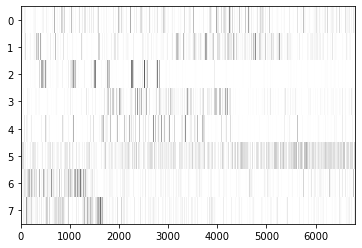

Topic 1                Topic 2      Topic 3     Topic 4     Topic 5     Topic 6    Topic 7   Topic 8     
-------                -------      -------     -------     -------     -------    -------   -------     
thank                  govpencein   gopdebate   tedcruz     kasich      hillary    randpaul  fitn        
trump2016              indiana      imwithhuck  cruz        john        trump      iowa      new         
makeamericagreatagain  indiana_edc  jeb         cruzcrew    johnkasich  people     iacaucus  hampshire   
great                  state        tonight     ted         ohio        donald     caucus    johnkasich  
america                jobs         president   choosecruz  gov         president  tonight   nh          

For LaTeX table...
------------------
thank & govpencein & gopdebate & tedcruz \\
trump2016 & indiana & imwithhuck & cruz \\
makeamericagreatagain & indiana_edc & jeb & cruzcrew \\
great & state & tonight & ted \\
america & jobs & president & choosecruz \\


In [9]:
plt.imshow(S,aspect='auto',cmap='binary',interpolation='none')
plt.show()

keywords = np.empty((7,r), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"

for i in range(A.shape[1]):
    col = A[:,i]
    top = col.argsort()
    top = top[-5:][::-1]

    keywords[2:,i] = idx_to_word[top] 


col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(len(row))))
    
print("")
print("For LaTeX table...")  
print("------------------")
col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for i, row in enumerate(keywords):
    if(i >= 2):
        print(" & ".join([row[i] for i in range(0,4)]) + " \\\\")
for i, row in enumerate(keywords):
    if(i >= 2):
        print(" & ".join([row[i] for i in range(4,8)]) + " \\\\")

### Experiment 2: Guided NMF on Twitter Data

In [10]:
np.random.seed(1)

model_2 = SSNMF(X_avg.T,r,Y=Y.T,lam=0.5)
N=200
model_2.snmfmult(numiters = N)

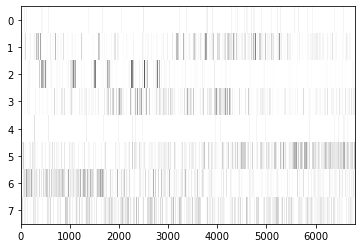

Topic 1  Topic 2      Topic 3    Topic 4   Topic 5     Topic 6    Topic 7     Topic 8        
-------  -------      -------    -------   -------     -------    -------     -------        
economy  govpencein   gopdebate  tedcruz   obamacare   hillary    johnkasich  people         
jobs     indiana      kasich     thank     fullrepeal  trump      new         need           
tax      indiana_edc  randpaul   cruz      repeal      donald     fitn        must           
plan     state        john       cruzcrew  replace     clinton    kasich      berniesanders  
create   jobs         tonight    ted       fight       president  hampshire   country        

For LaTeX table...
------------------
economy & govpencein & gopdebate & tedcruz \\
jobs & indiana & kasich & thank \\
tax & indiana_edc & randpaul & cruz \\
plan & state & john & cruzcrew \\
create & jobs & tonight & ted \\
obamacare & hillary & johnkasich & people \\
fullrepeal & trump & new & need \\
repeal & donald & fitn & must \\
rep

In [12]:
S = model_2.A.T
A = model_2.S.T

plt.imshow(S,aspect='auto',cmap='binary',interpolation='none')
plt.show()

keywords = np.empty((7,r), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"

for i in range(A.shape[1]):
    col = A[:,i]
    top = col.argsort()
    top = top[-5:][::-1]

    keywords[2:,i] = idx_to_word[top] 

col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(len(row))))
    
print("")
print("For LaTeX table...")  
print("------------------")
col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for i, row in enumerate(keywords):
    if(i >= 2):
        print(" & ".join([row[i] for i in range(0,4)]) + " \\\\")
for i, row in enumerate(keywords):
    if(i >= 2):
        print(" & ".join([row[i] for i in range(4,8)]) + " \\\\")